# Census Income Project

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# Importing Requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Census Income Project.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
## checking shape of dataset
df.shape

(32560, 15)

we have 32560 rows and 15 columns including target attribute Income.

This is a classification problem statement in which we have to classify wheather a person earns more that 50k or not.

In [4]:
## checking data type
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

1-We have 6 attributes of integer data type and 9 attribute of object datatype.

2-Data type of all attributes are ok

In [5]:
## checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1-We can see that there is no null values present in our dataset.

2-All datatypes are also ok.

In [6]:
## Checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:title={'center':'Heatmap Null values'}>

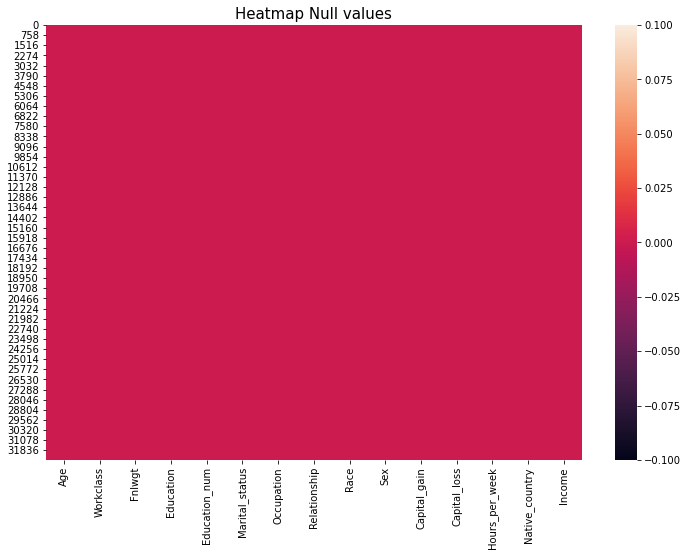

In [7]:
plt.figure(figsize=(12,8))
plt.title('Heatmap Null values',fontsize=15)
sns.heatmap(df.isnull())

from above heatmap it is clear that there is no null value present in our dataset.

In [8]:
## Statistical Summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1-We can observe that from above table is mostly attributes are Normally distributed.

2-Fnlwgt is and Age are a little right skewd in distribution because mean values is a bit more than the median values.'

3-Attribute Capital_loss and captial_gain contains majority of zero values.Mean, Mean and Min values are zero. We can further investigate about it.

4-It seems that outliers values would be less in our dataset because the difference seems managable between 75Th quantile and max values.

In [9]:
## checking zero count
df[df['Capital_gain']==0].count()

Age               29849
Workclass         29849
Fnlwgt            29849
Education         29849
Education_num     29849
Marital_status    29849
Occupation        29849
Relationship      29849
Race              29849
Sex               29849
Capital_gain      29849
Capital_loss      29849
Hours_per_week    29849
Native_country    29849
Income            29849
dtype: int64

Capital_gain conatain 91.67% of zero values.

In [10]:
# checking Zero count
df[df['Capital_loss']==0].count()

Age               31041
Workclass         31041
Fnlwgt            31041
Education         31041
Education_num     31041
Marital_status    31041
Occupation        31041
Relationship      31041
Race              31041
Sex               31041
Capital_gain      31041
Capital_loss      31041
Hours_per_week    31041
Native_country    31041
Income            31041
dtype: int64

95.33% of Captial_loss values are zero.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

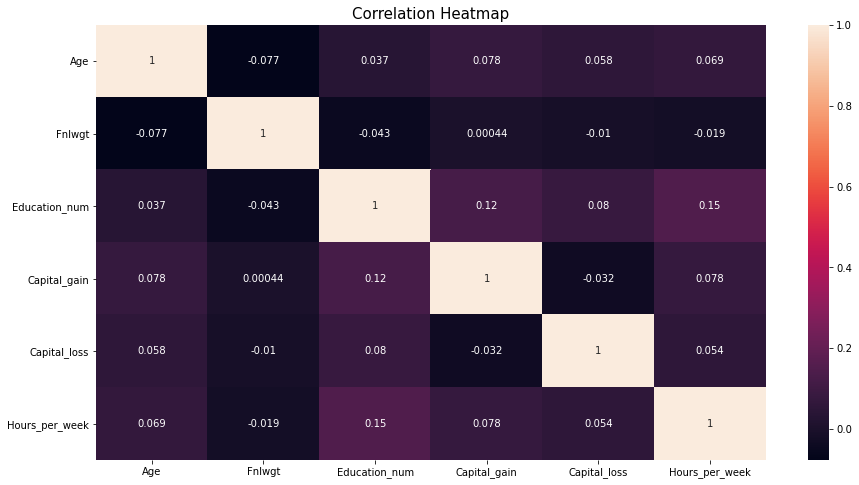

In [11]:
## correlation Plot
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True)

Observations :-

1. The sample weight i.e. 'fnlwgt' is negatively related with other variables.

2. The numeric variables are not strongly correlated.

3. Neither the strong positive nor the strong negative correlation present in any variable.

4. There is a postive (>.1) correlation between Education_num and captial_gain

# Segregation of Object and Numeric DataType for Analyis

In [12]:
## for Numeric Attributes
num_df=df.select_dtypes(exclude='object')

## for categorical Attributes
obj_df=df.select_dtypes(include='object')

In [13]:
num_df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [14]:
obj_df

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


# Categorical Attributes 

In [15]:
for col in obj_df:
    print('--------------',col,'------------------------')
    print(obj_df[col].value_counts())
    

-------------- Workclass ------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-------------- Education ------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
-------------- Marital_status ------------------------
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spous

1-We can see that Workclass,Occupation and Native Country contains a "?", we will replace with mode values.

2-

In [16]:
df=df.replace(' ?', np.nan)

In [17]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [18]:
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

In [19]:
df_1=df.copy()

In [20]:
df_1['Workclass']=df_1['Workclass'].replace([' Without-pay',' Never-worked'],'unemployed')
df_1['Workclass']=df_1['Workclass'].replace([' State-gov',' Local-gov',' Federal-gov'],'government')
df_1['Workclass']=df_1['Workclass'].replace([' Self-emp-not-inc',' Self-emp-inc'],'self_employed')

In [21]:
df_1['Workclass'].value_counts()

 Private         24532
government        4350
self_employed     3657
unemployed          21
Name: Workclass, dtype: int64

In [22]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [23]:
df_1['Education'].replace(' Preschool','dropout',inplace=True)
df_1['Education'].replace(' 10th','dropout',inplace=True)
df_1['Education'].replace(' 11th','dropout',inplace=True)
df_1['Education'].replace(' 12th','dropout',inplace=True)
df_1['Education'].replace(' 1st-4th','dropout',inplace=True)
df_1['Education'].replace(' 5th-6th','dropout',inplace=True)
df_1['Education'].replace(' 7th-8th','dropout',inplace=True)
df_1['Education'].replace(' 9th','dropout',inplace=True)
df_1['Education'].replace(' HS-Grad','HighGrad',inplace=True)
df_1['Education'].replace(' HS-grad','HighGrad',inplace=True)
df_1['Education'].replace(' Some-college','CommunityCollege',inplace=True)
df_1['Education'].replace(' Assoc-acdm','CommunityCollege',inplace=True)
df_1['Education'].replace(' Assoc-voc','CommunityCollege',inplace=True)
df_1['Education'].replace(' Bachelors','Bachelors',inplace=True)
df_1['Education'].replace(' Masters','Masters',inplace=True)
df_1['Education'].replace(' Prof-school','Masters',inplace=True)
df_1['Education'].replace(' Doctorate','Doctorate',inplace=True)

In [24]:
df_1['Education'].value_counts()

HighGrad            10501
CommunityCollege     9740
Bachelors            5354
dropout              4253
Masters              2299
Doctorate             413
Name: Education, dtype: int64

In [25]:
df_1['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [26]:
df_1['Marital_status']=df_1['Marital_status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'married')
df_1['Marital_status']=df_1['Marital_status'].replace([' Separated',' Widowed',' Divorced',' Married-spouse-absent'],'once_married')
df_1['Marital_status']=df_1['Marital_status'].replace(' Never-married','never_married')

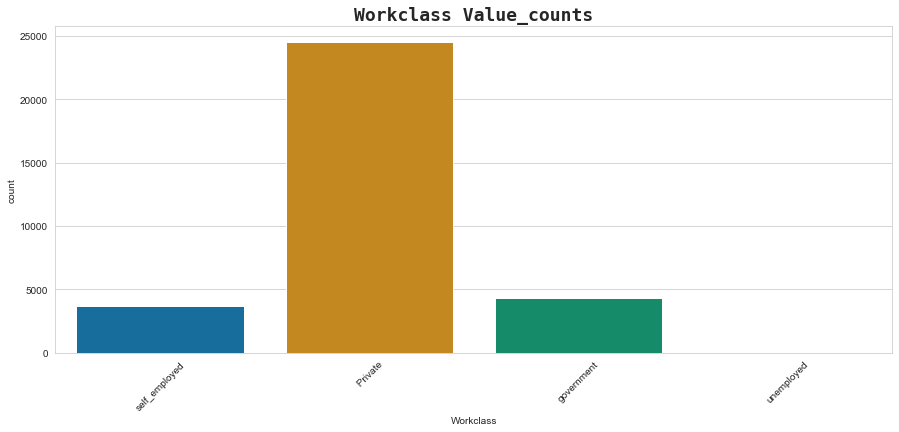

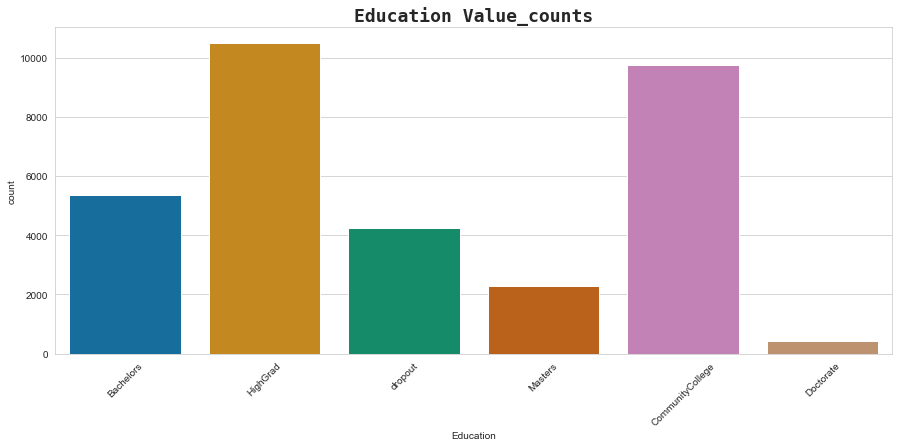

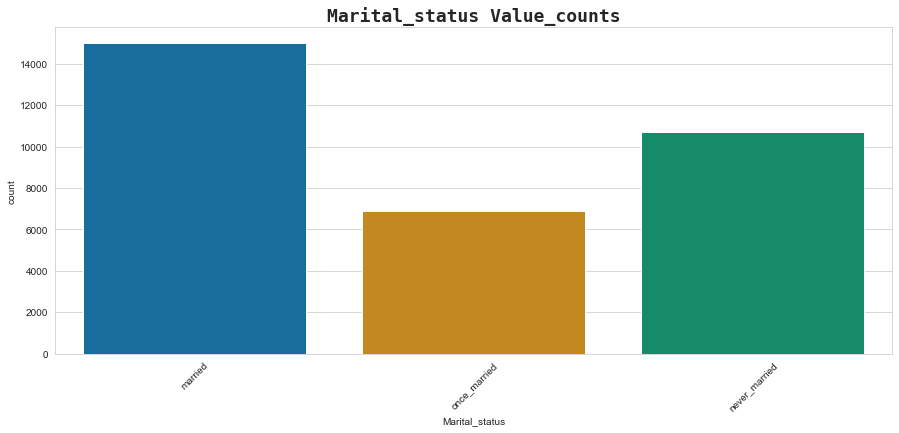

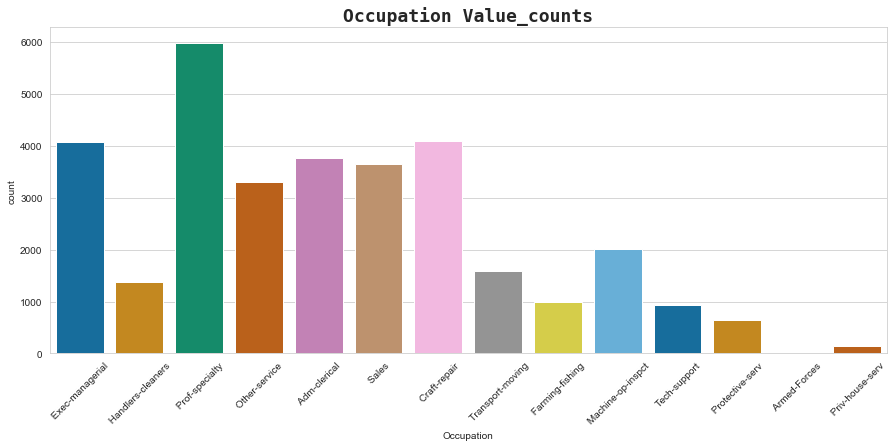

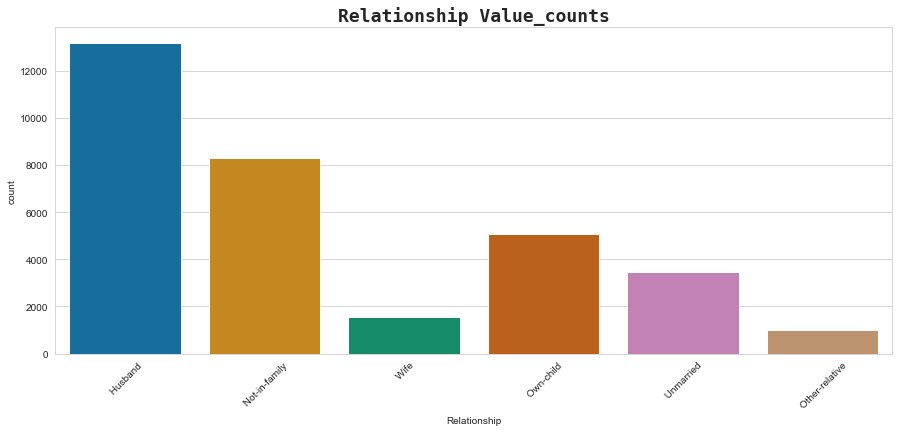

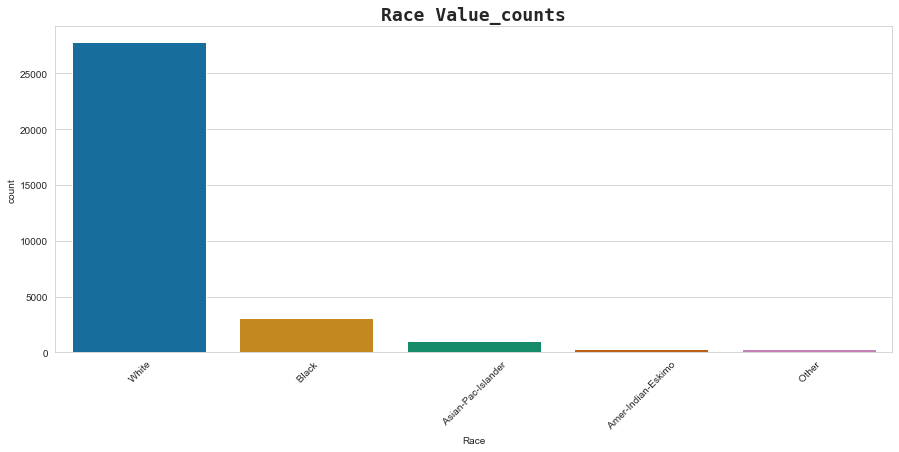

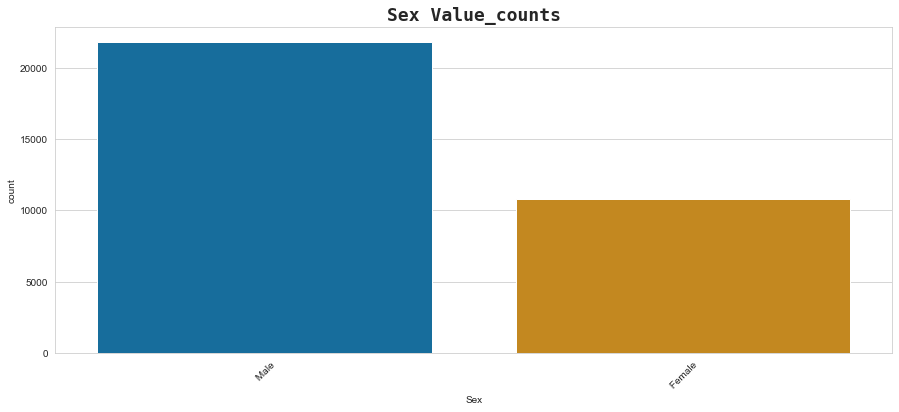

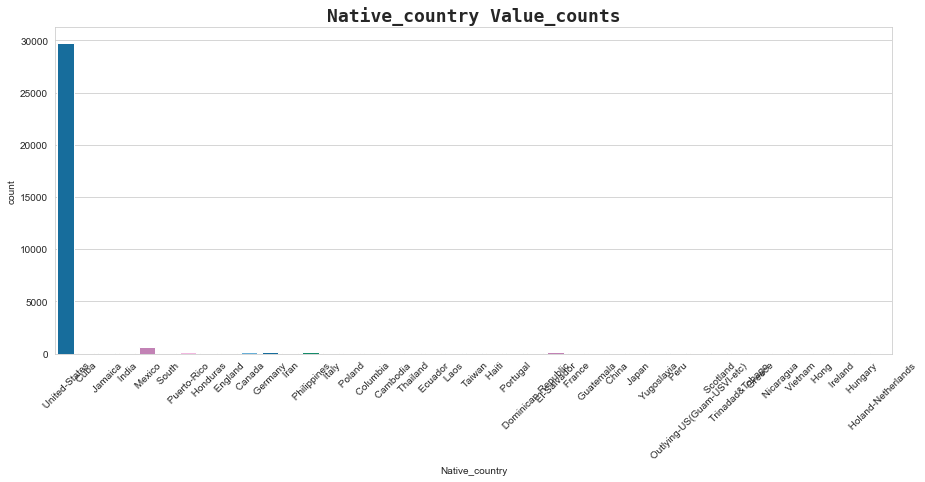

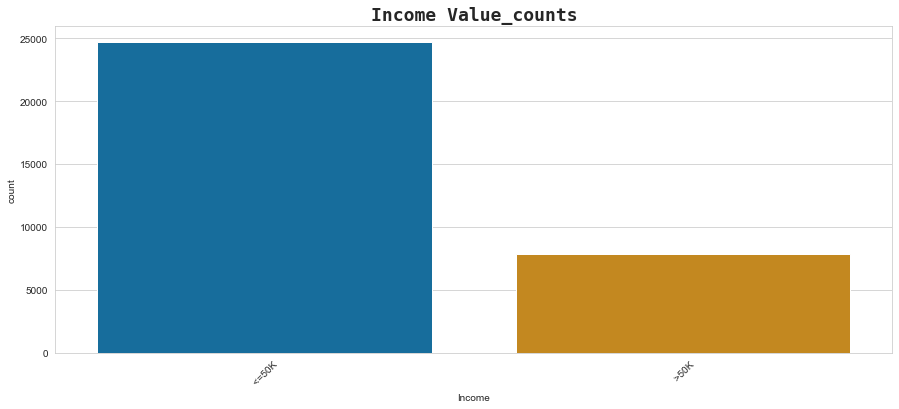

In [27]:
obj=df_1.select_dtypes(include='object')
for col in obj:
    sns.set_style('whitegrid')
    plt.figure(figsize=(15,6))
    plt.title(col+' Value_counts',fontsize=18,fontname='Monospace',fontweight='bold')
    plt.xticks(rotation=45)
    x = sns.countplot(df_1[col],palette='colorblind',data=df_1)
    plt.show()

Observation:
1. workclass -  The count of individuals working in a private sector is high as compared to other sectors.

2. education  - The count of individuals having HS-grad are more follwed by the individuals having community-college, followed by bachelor people.

3. marital-status -  The individual who married are more followed by the individuals who not-married. The count of once married inviduals  is above 6000.

4. occupation  - The count of  individuals working as a Prof-specialty id higest in the data followed by individuals working as a Craft-repair > Exec-managerial > Adm-clerical > Sales > Other-service.

5. relationship  - The count of individuals as husband is approx. 13200 followed by individuals not-in-family as compared to other individual's relationship.

6. race  - The count of white individuals is high.

7. sex - The count of females is alost half of the count of males.

8. native-country - The majority of individuals belongs to United-States.

9. income - The no. of individuals have income of more than or equal to 50k.

Text(0, 0.5, 'Number of people')

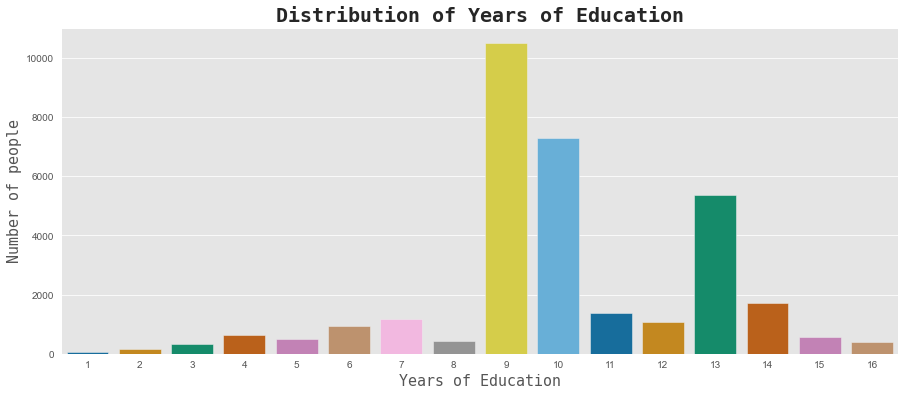

In [28]:
# Creating a barplot for 'Years of Education'

plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
sns.countplot(df_1['Education_num'], palette='colorblind',data=df_1)
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})

Observation:
1- We can observe that Mostly people have done 9 years of education followed by 10 years then 13 & 14 years.

[]

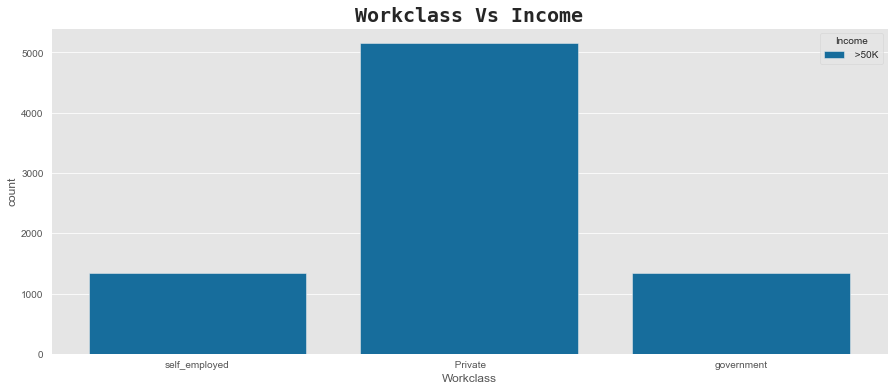

In [29]:
plt.figure(figsize=(15,6))
plt.title('Workclass Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Workclass", hue ="Income",palette='colorblind' ,data = df_1[df_1['Income']==' >50K'])
plt.plot()

[]

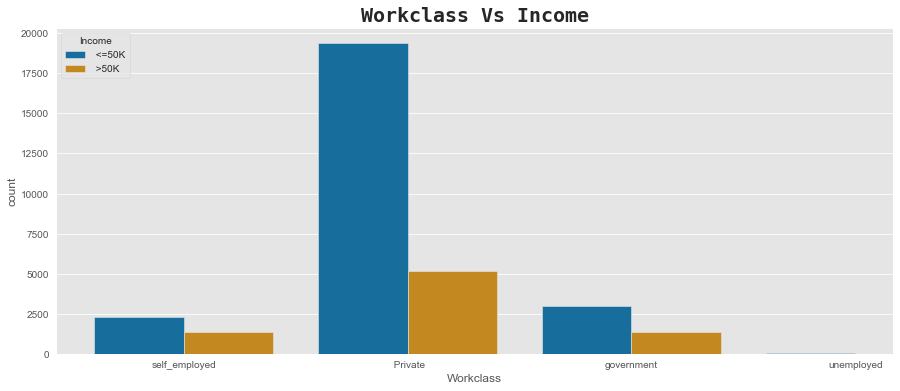

In [30]:
plt.figure(figsize=(15,6))
plt.title('Workclass Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Workclass", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

We can see that people who are in private job ears more than 50k followed by self_employed and Government job.

[]

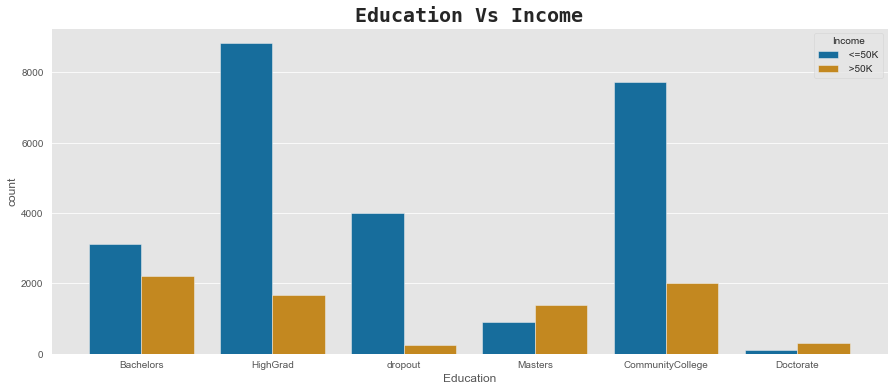

In [31]:
plt.figure(figsize=(15,6))
plt.title('Education Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Education", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

We can observe that, People who have gone for Bachleors are earning more than 50k.Additionally, people who gone for masters and Doctorate ears very well which is more than 50k 

[]

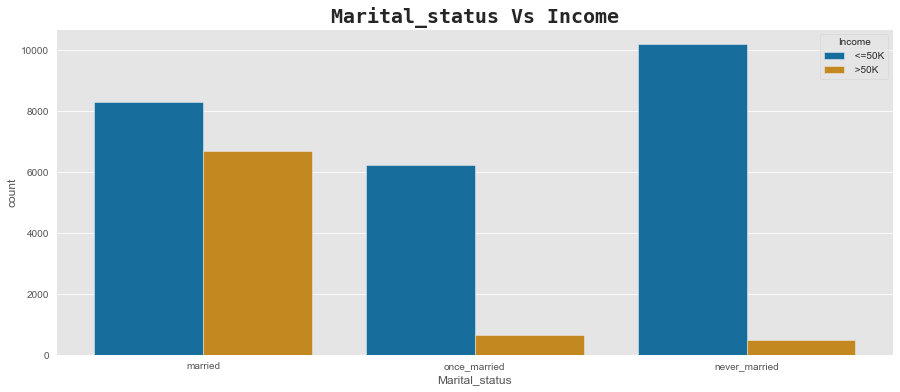

In [32]:
plt.figure(figsize=(15,6))
plt.title('Marital_status Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Marital_status", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

We can see that married people earned mostly more than 50k whereas People who divorced,Seperated or widows generally ears less than 50k.

[]

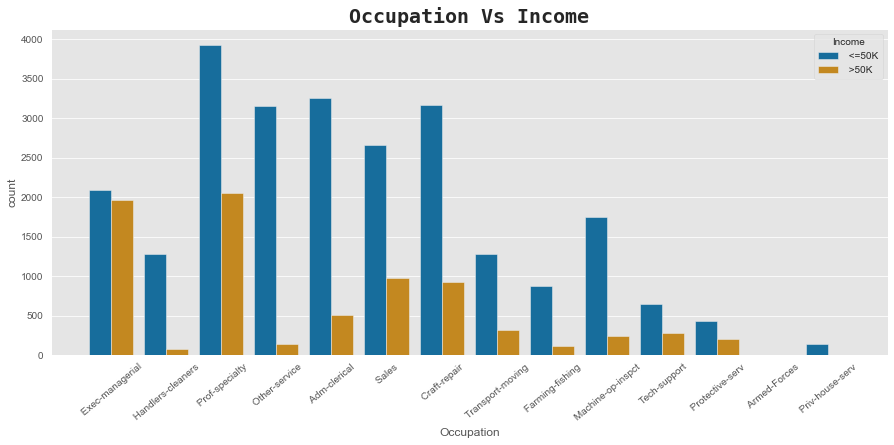

In [33]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=40)
plt.title('Occupation Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Occupation", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

We can see that people who had been in Managerial Position ears mostly above 50k.

As well, People who have some teaching career like professor are also earning 50k as comapired to other occupation.

Sales and carft repair occupation also earns more than 50k.

farming-fishing,Armed Forces and Private house service occpationalist generally not earns more than 50k.

[]

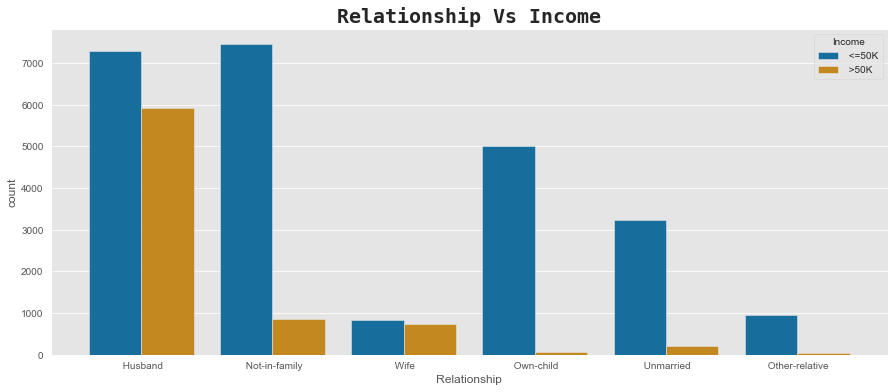

In [34]:
plt.figure(figsize=(15,6))
plt.title('Relationship Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Relationship", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

We can see that Husbands are earling more than 50k compaired to wife. But in ratios, wife have good numbers in figure to earn more than 50k.'

People who are single or Unmarried earns majorly below 50k.

[]

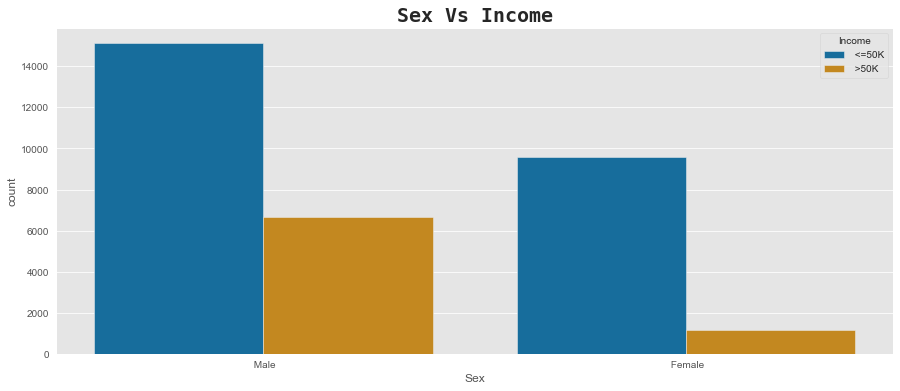

In [35]:
plt.figure(figsize=(15,6))
plt.title('Sex Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Sex", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

|Males earned more than 50k as compared to Female.

[]

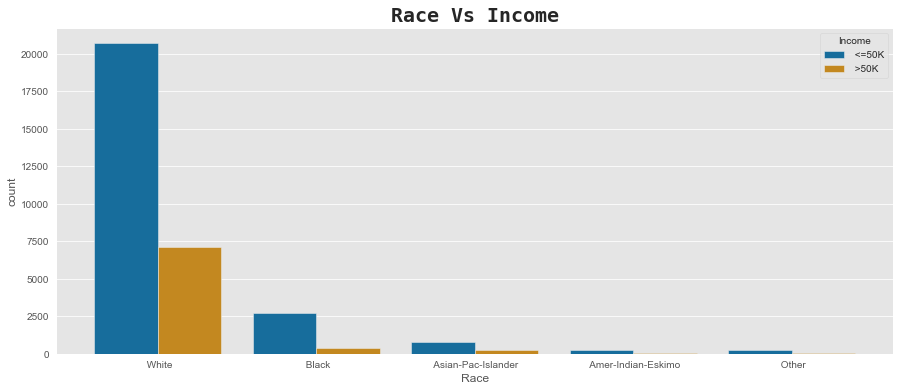

In [36]:
plt.figure(figsize=(15,6))
plt.title('Race Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Race", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

White people are the highest earnes. Approx 7000 of white people earns more than 50k.

For, black people majority of than earns less than 50k.

[]

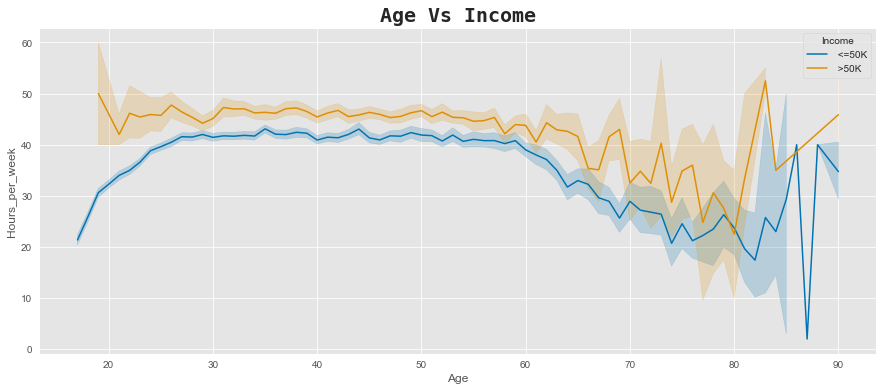

In [37]:
plt.figure(figsize=(15,6))
plt.title('Age Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.lineplot(x ="Age", y='Hours_per_week',hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

[]

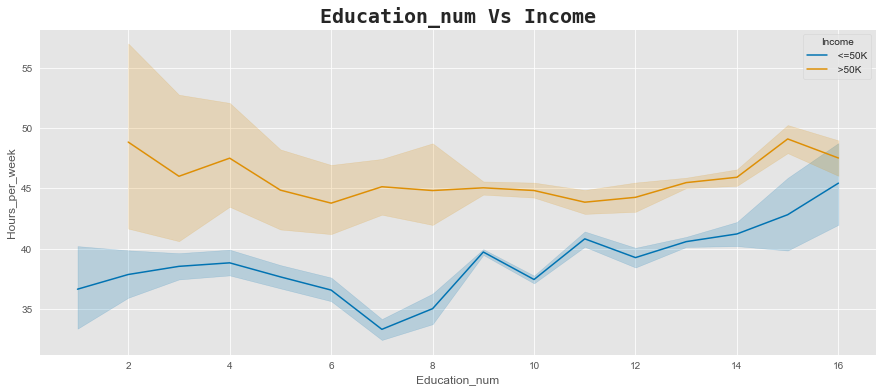

In [38]:
plt.figure(figsize=(15,6))
plt.title('Education_num Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.lineplot(x ='Education_num', y='Hours_per_week',hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

We can see that the people who earns more than 50k, work more than 43hr a week whereas people who earn less than 50k works below 40hr in week.

[]

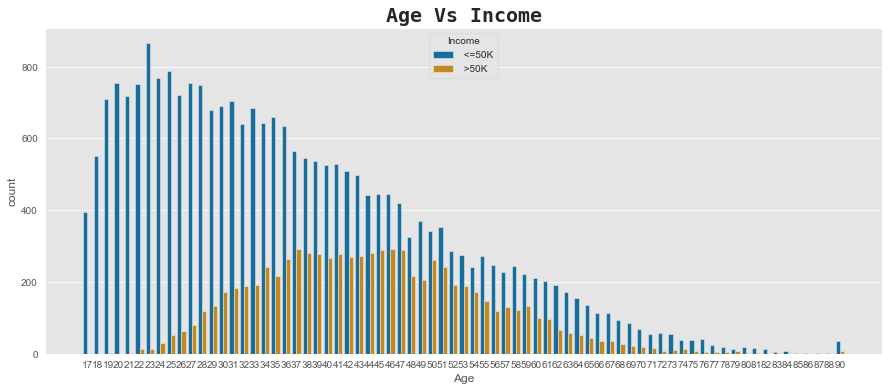

In [39]:
plt.figure(figsize=(15,6))
plt.title('Age Vs Income',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
sns.countplot(x ="Age", hue ="Income",palette='colorblind' ,data = df_1)
plt.plot()

We can see that people who earned more than 50k has a age group of 31-55(mostly).

We can observe that people who has the age group of 17-31 generally earns less than 50k.

Text(0.5, 1.0, 'Gender as per education_level - Barplot')

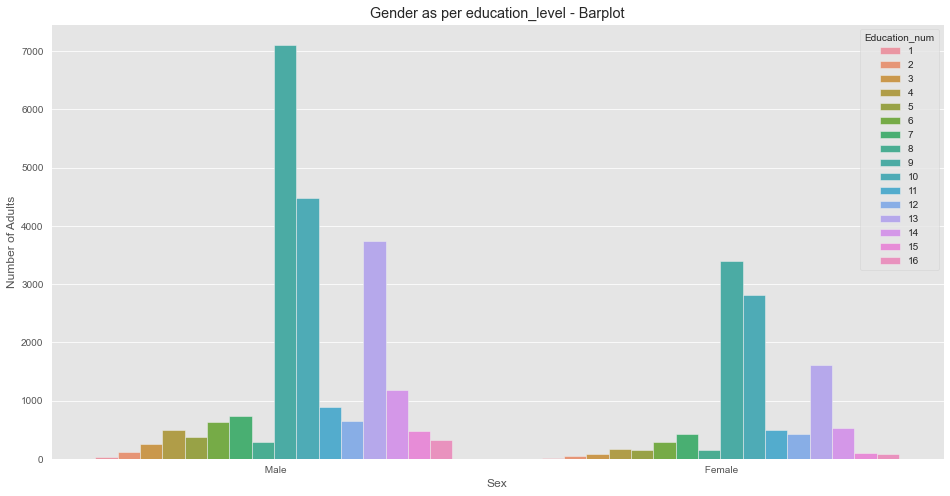

In [81]:
plt.figure(figsize=(16,8))
sns.countplot(x="Sex",hue="Education_num", data = df_1)
plt.ylabel('Number of Adults')
plt.title('Gender as per education_level - Barplot')

Very few females have education level ≥ 14 in the dataset where the majority of adults earn more than 50k dollars annually, this explains a bit why very few females earn more than 50k dollars annually

Text(0.5, 1.0, 'Gender as per occupation - Barplot')

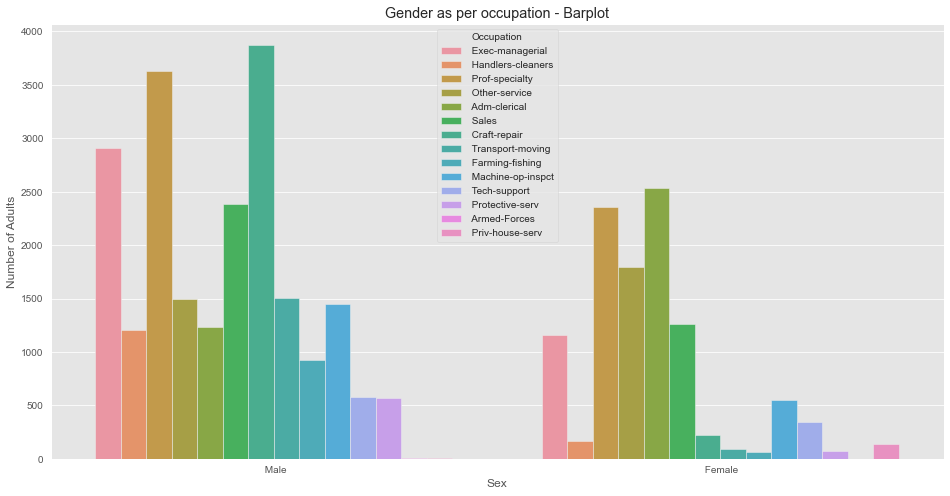

In [83]:
plt.figure(figsize=(16,8))
sns.countplot(x="Sex",hue="Occupation", data = df_1)
plt.ylabel('Number of Adults')
plt.title('Gender as per occupation - Barplot')

Representation of females is very high in Adm-clerical jobs which is a relatively low income occupation, also female representation is very low in craft repair occupation which is a relatively higher income occupation, this also explains a bit why males earn higher

# Distribution

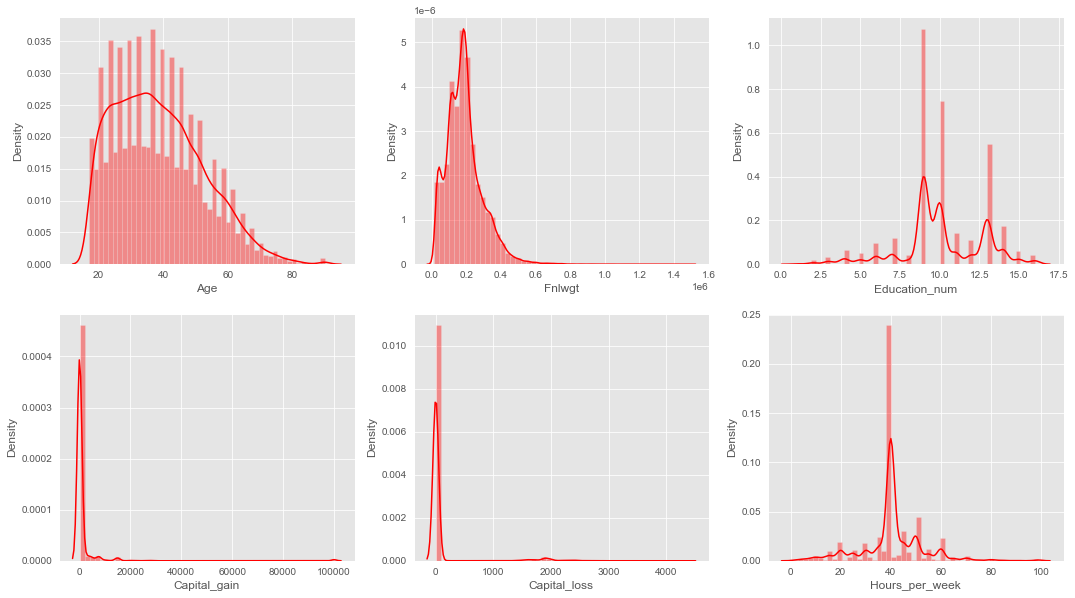

In [40]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.distplot(df_1[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.show()  

1-Age and Fnlwgt are right skewed.

2-Education_num has variation, which need treatment.

3-captital_gain & Capital_loss are highly right skewed with majority values are zero.

4- Although Hours_per_week seems Normal Distributed but it shows some variation in so, we need to treat.

# Outliers Detection

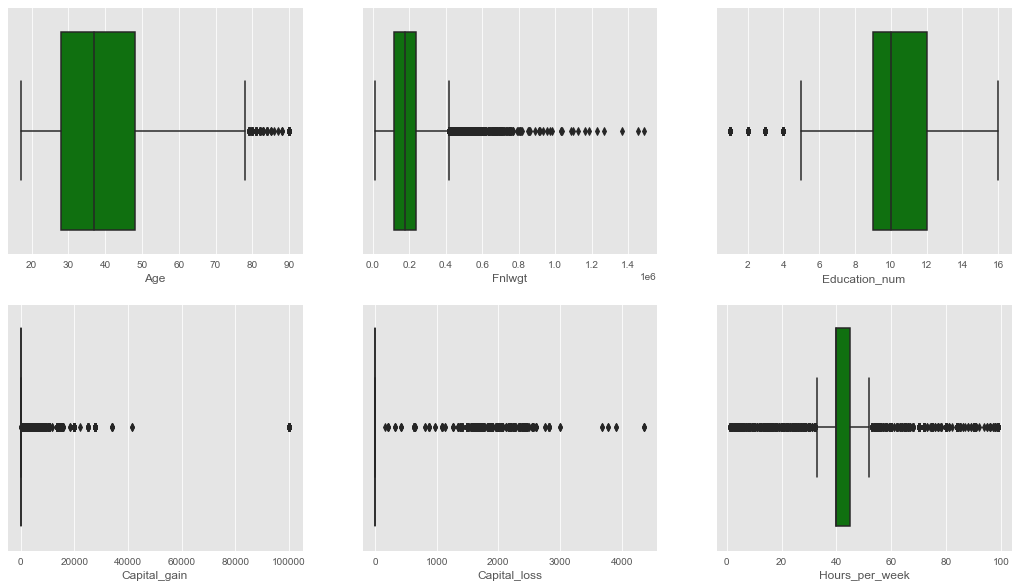

In [41]:
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df_1[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show()

In [42]:
def outlier_IQR(data,col):
    IQR=data[col].quantile(.75)-data[col].quantile(.25)
    lower_bridge=data[col].quantile(.25)-(IQR*1.5)
    upper_bridge=data[col].quantile(.75)+(IQR*1.5)
    non_outlier=np.where((data[col]<lower_bridge )|(data[col]>upper_bridge),data[col].median(),data[col])
    data[col]=non_outlier
    sns.boxplot(data[col])

In [43]:
df_1.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

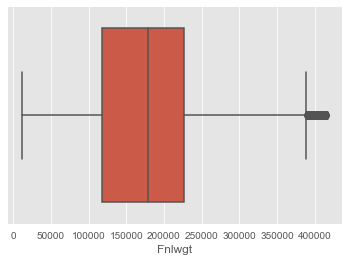

In [44]:
outlier_IQR(df_1,'Fnlwgt')

In [45]:
## when data is normally distributed.
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

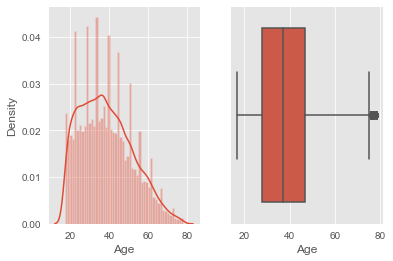

In [46]:
replace_outlier(df_1,'Age')

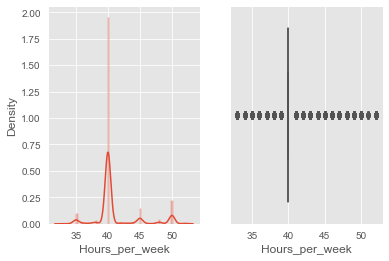

In [47]:
replace_outlier(df_1,'Hours_per_week')

In [48]:
df_1.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

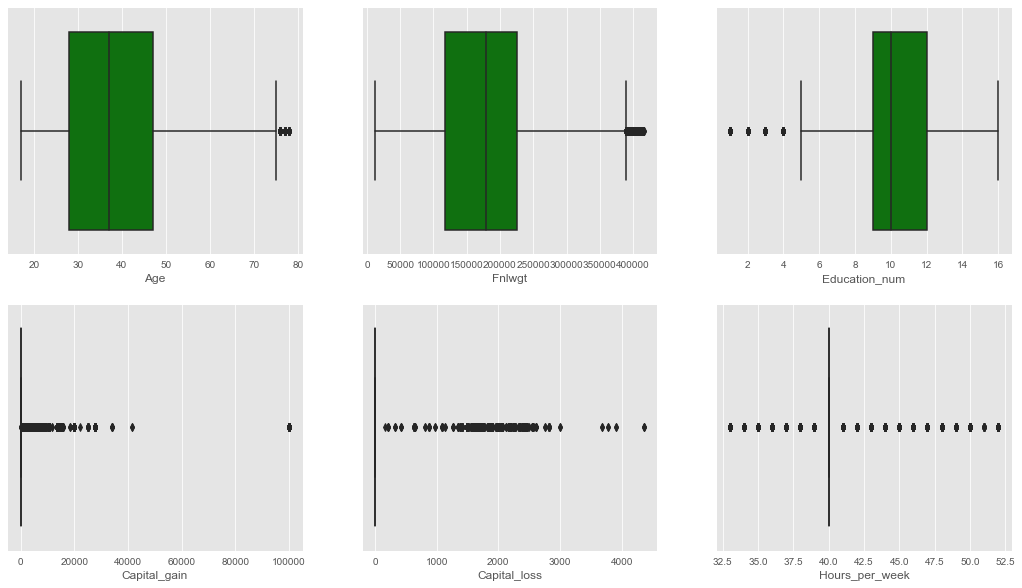

In [49]:
## Again Checking Distribution
plt.figure(figsize=(18,10))
plot=1
for col in num_df:
    if plot<=6:
        plt.subplot(2,3,plot)
        sns.boxplot(df_1[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show()

1-Outliers has been removed.

2- We didnot remove outliers of capital_gain & capital_loss because it contains more than 90% values of Zero. we will drop it further.

In [50]:
df_1=df_1.drop(['Capital_gain','Capital_loss'],axis=1)

# Skewness

In [51]:
df_1.skew()

Age               0.470101
Fnlwgt            0.419158
Education_num    -0.311630
Hours_per_week    1.483592
dtype: float64

In [52]:
df_2=df_1.copy()

In [53]:
df_2['Hours_per_week']=np.log1p(df_2['Hours_per_week'])

In [54]:
df_2.skew()

Age               0.470101
Fnlwgt            0.419158
Education_num    -0.311630
Hours_per_week    1.254175
dtype: float64

So, the skewness has been reduced to it's possible extent.

# Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj:
    df_2[col]=le.fit_transform(df_2[col])
    

In [56]:
df_2.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50.0,2,83311.0,0,13,0,3,0,4,1,3.713572,38,0
1,38.0,0,215646.0,3,9,2,5,1,4,1,3.713572,38,0
2,53.0,0,234721.0,5,7,0,5,0,2,1,3.713572,38,0
3,28.0,0,338409.0,0,13,0,9,5,2,0,3.713572,4,0
4,37.0,0,284582.0,4,14,0,3,5,4,0,3.713572,38,0


# Splitting Data into Input and Output Variable

In [57]:
x=df_2.drop(['Income'],axis=1)
y=df_2[['Income']]

In [58]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50.0,2,83311.0,0,13,0,3,0,4,1,3.713572,38
1,38.0,0,215646.0,3,9,2,5,1,4,1,3.713572,38
2,53.0,0,234721.0,5,7,0,5,0,2,1,3.713572,38
3,28.0,0,338409.0,0,13,0,9,5,2,0,3.713572,4
4,37.0,0,284582.0,4,14,0,3,5,4,0,3.713572,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27.0,0,257302.0,1,12,0,12,5,4,0,3.663562,38
32556,40.0,0,154374.0,3,9,0,6,0,4,1,3.713572,38
32557,58.0,0,151910.0,3,9,2,0,4,4,0,3.713572,38
32558,22.0,0,201490.0,3,9,1,0,3,4,1,3.713572,38


In [59]:
y

,Income
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


# Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.873962,2.420574,-1.119241,-1.359288,1.134779,-0.961272,-0.790156,-0.900177,0.393675,0.703087,-0.305933,0.261374
1,-0.028233,-0.531644,0.419057,0.471337,-0.420027,1.600021,-0.286703,-0.277810,0.393675,0.703087,-0.305933,0.261374
2,1.099511,-0.531644,0.640790,1.691754,-1.197429,-0.961272,-0.286703,-0.900177,-1.962583,0.703087,-0.305933,0.261374
3,-0.780062,-0.531644,1.846088,-1.359288,1.134779,-0.961272,0.720204,2.211658,-1.962583,-1.422298,-0.305933,-5.352855
4,-0.103416,-0.531644,1.220388,1.081545,1.523480,-0.961272,-0.790156,2.211658,0.393675,-1.422298,-0.305933,0.261374
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.855245,-0.531644,0.903278,-0.749079,0.746077,-0.961272,1.475385,2.211658,0.393675,-1.422298,-0.942050,0.261374
32556,0.122133,-0.531644,-0.293186,0.471337,-0.420027,-0.961272,-0.034976,-0.900177,0.393675,0.703087,-0.305933,0.261374
32557,1.475426,-0.531644,-0.321828,0.471337,-0.420027,1.600021,-1.545336,1.589291,0.393675,-1.422298,-0.305933,0.261374
32558,-1.231160,-0.531644,0.254504,0.471337,-0.420027,0.319375,-1.545336,0.966924,0.393675,0.703087,-0.305933,0.261374


# Feature Importance

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [62]:
print(extra.feature_importances_)

[0.20512053 0.02625363 0.24351852 0.04763689 0.09237139 0.11093657
 0.09206928 0.06902799 0.01714498 0.02261036 0.05474156 0.01856831]


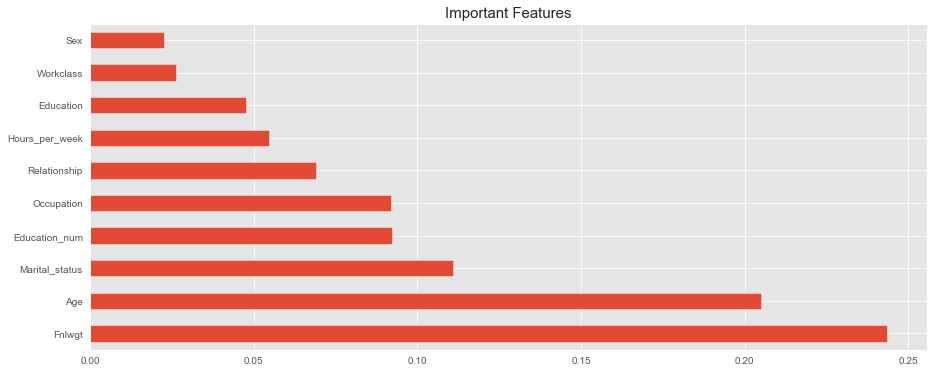

In [63]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

# Model Building

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [73]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

max accuracy score corresponding to 85 is 0.8289312039312039


cross validation score 0.8162469287469287


Standard Deviation 0.0036696012361778513


F1 score 0.5472191116088092


Training accuracy 0.8170300982800983


Test Accuracy 0.8137285012285013


Confusion Matrix [[4566  378]
 [ 835  733]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4944
           1       0.66      0.47      0.55      1568

    accuracy                           0.81      6512
   macro avg       0.75      0.70      0.71      6512
weighted avg       0.80      0.81      0.80      6512



Roc_auc Score 0.6955090895581534





85

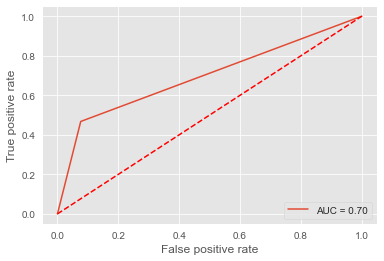

In [74]:
## Logistic Regression
lg=LogisticRegression()
max_accuracy_score(lg,x,y)

max accuracy score corresponding to 87 is 0.7791769041769042


cross validation score 0.7673218673218674


Standard Deviation 0.0037522116058875633


F1 score 0.5431034482758622


Training accuracy 0.9996928746928747


Test Accuracy 0.7721130221130221


Confusion Matrix [[4146  798]
 [ 686  882]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85      4944
           1       0.53      0.56      0.54      1568

    accuracy                           0.77      6512
   macro avg       0.69      0.70      0.70      6512
weighted avg       0.78      0.77      0.77      6512



Roc_auc Score 0.7005461165048544





87

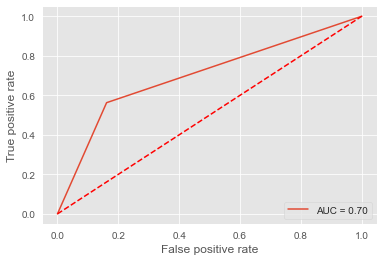

In [75]:
## DEcision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 95 is 0.8223280098280098


cross validation score 0.8092751842751843


Standard Deviation 0.0036765349512642245


F1 score 0.5836653386454183


Training accuracy 0.8657862407862408


Test Accuracy 0.8074324324324325


Confusion Matrix [[4379  565]
 [ 689  879]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4944
           1       0.61      0.56      0.58      1568

    accuracy                           0.81      6512
   macro avg       0.74      0.72      0.73      6512
weighted avg       0.80      0.81      0.80      6512



Roc_auc Score 0.7231533997093983





95

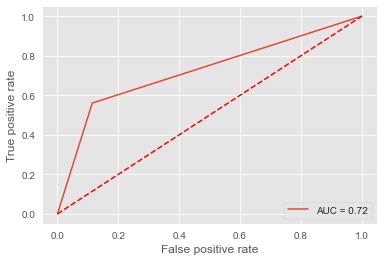

In [76]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 82 is 0.7853194103194103


cross validation score 0.7756756756756757


Standard Deviation 0.00409341697335288


F1 score 0.5852304275402554


Training accuracy 0.7752994471744472


Test Accuracy 0.7705773955773956


Confusion Matrix [[3964  980]
 [ 514 1054]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.80      0.84      4944
           1       0.52      0.67      0.59      1568

    accuracy                           0.77      6512
   macro avg       0.70      0.74      0.71      6512
weighted avg       0.80      0.77      0.78      6512



Roc_auc Score 0.7369869064130506





82

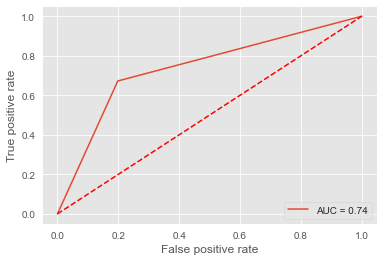

In [77]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 47 is 0.8261670761670762


cross validation score 0.8172604422604423


Standard Deviation 0.004370901369194458


F1 score 0.59830220713073


Training accuracy 0.9996160933660934


Test Accuracy 0.8183353808353808


Confusion Matrix [[4448  496]
 [ 687  881]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4944
           1       0.64      0.56      0.60      1568

    accuracy                           0.82      6512
   macro avg       0.75      0.73      0.74      6512
weighted avg       0.81      0.82      0.81      6512



Roc_auc Score 0.7307693101512449





47

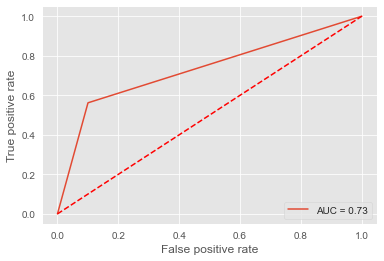

In [78]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 84 is 0.8418304668304668


cross validation score 0.8333230958230958


Standard Deviation 0.004289431272469015


F1 score 0.6135401974612129


Training accuracy 0.8346130221130221


Test Accuracy 0.8316953316953317


Confusion Matrix [[4546  398]
 [ 698  870]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4944
           1       0.69      0.55      0.61      1568

    accuracy                           0.83      6512
   macro avg       0.78      0.74      0.75      6512
weighted avg       0.82      0.83      0.83      6512



Roc_auc Score 0.7371726603262664





84

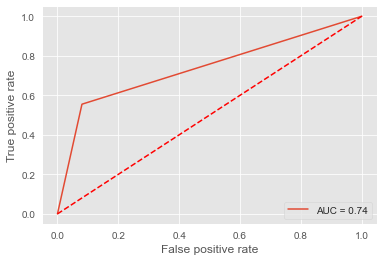

In [79]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 58 is 0.8456695331695332


cross validation score 0.8369471744471746


Standard Deviation 0.003548593368639832


F1 score 0.627696590118302


Training accuracy 0.8411394348894349


Test Accuracy 0.8356879606879607


Confusion Matrix [[4540  404]
 [ 666  902]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4944
           1       0.69      0.58      0.63      1568

    accuracy                           0.84      6512
   macro avg       0.78      0.75      0.76      6512
weighted avg       0.83      0.84      0.83      6512



Roc_auc Score 0.7467699458424146





58

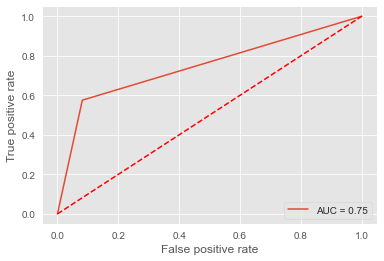

In [80]:
## Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)


In [84]:
best_model=pd.DataFrame({'Model':['LogisticRegression','DecisionTreeClassifier','Naive Bayes','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'],
                         'Accuracy Score':[82.89,77.91,82.23,78.53,82.61,84.18,84.56],
                         'F1_Score':[54.72,58.31,58.36,58.52,59.83,61.35,62.76],
                         'Cross_validation':[81.62,76.73,80.92,77.56,81.72,83.33,83.69]})
best_model   

,Model,Accuracy Score,F1_Score,Cross_validation
0,LogisticRegression,82.89,54.72,81.62
1,DecisionTreeClassifier,77.91,58.31,76.73
2,Naive Bayes,82.23,58.36,80.92
3,GaussianNB,78.53,58.52,77.56
4,RandomForestClassifier,82.61,59.83,81.72
5,AdaBoostClassifier,84.18,61.35,83.33
6,GradientBoostingClassifier,84.56,62.76,83.69


Here our Adaboost model is most generalized model because the difference between accuracy score and Cross validation score is minimum. So we will select AdaBoost Classifier as our best model

# Hyperparameter Tuning

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84,test_size=.20,stratify=y)
ada=AdaBoostClassifier()
param={'n_estimators': [100,200,300],'learning_rate':[.001,.01,.1,1,10],'algorithm':['SAMME', 'SAMME.R']}

grid=GridSearchCV(estimator=ada,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_


{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 300}

In [87]:
ada_final=AdaBoostClassifier(n_estimators=300,algorithm='SAMME.R',learning_rate=1)
ada_final.fit(x_train,y_train)
pred=ada_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.8435196560196561


Final f_1 score : 0.6348978860623432


Final roc_auc score : 0.7977506038157226


Final classification Report :               precision    recall  f1-score   support

           0       0.93      0.87      0.90      5289
           1       0.57      0.72      0.63      1223

    accuracy                           0.84      6512
   macro avg       0.75      0.80      0.77      6512
weighted avg       0.86      0.84      0.85      6512



Final confusion Matrix : [[4607  682]
 [ 337  886]]


We can see that our accuracy score has been improved from 84.18 to 84.35. Additionally our f_1 score also improved from 61.35 to 63.48

# saving our model

In [88]:
import joblib
joblib.dump(ada_final,'Census_income_ada.pkl')

['Census_income_ada.pkl']

In [ ]:
loaded_model=joblib.load('Census_income_ada.pkl')
prediction=loaded_model.predict(x_test)